In [1]:
import pandas as pd

election_df = pd.read_csv("countypres_2000-2020.csv")

# use relevant cols and remove rows with missing vals
election_data_cleaned = election_df[
    ['year', 'state', 'state_po', 'county_name', 'county_fips', 'candidate', 
     'party', 'candidatevotes', 'totalvotes']
].dropna()

# update cols names
rename_map = {
    'state_po': 'state_abbreviation',
    'county_fips': 'fips_code',
    'candidatevotes': 'votes_candidate',
    'totalvotes': 'votes_total'
}
election_data_cleaned = election_data_cleaned.rename(columns=rename_map)

election_data_cleaned

,year,state,state_abbreviation,county_name,fips_code,candidate,party,votes_candidate,votes_total
0,2000,ALABAMA,AL,AUTAUGA,1001.0,AL GORE,DEMOCRAT,4942,17208
1,2000,ALABAMA,AL,AUTAUGA,1001.0,GEORGE W. BUSH,REPUBLICAN,11993,17208
2,2000,ALABAMA,AL,AUTAUGA,1001.0,RALPH NADER,GREEN,160,17208
3,2000,ALABAMA,AL,AUTAUGA,1001.0,OTHER,OTHER,113,17208
4,2000,ALABAMA,AL,BALDWIN,1003.0,AL GORE,DEMOCRAT,13997,56480
...,...,...,...,...,...,...,...,...,...
72612,2020,WYOMING,WY,WASHAKIE,56043.0,DONALD J TRUMP,REPUBLICAN,3245,4032
72613,2020,WYOMING,WY,WESTON,56045.0,JOSEPH R BIDEN JR,DEMOCRAT,360,3560
72614,2020,WYOMING,WY,WESTON,56045.0,JO JORGENSEN,LIBERTARIAN,46,3560
72615,2020,WYOMING,WY,WESTON,56045.0,OTHER,OTHER,47,3560


In [2]:
# Summarizing election results for each county by year and the party


county_results = election_data_cleaned.groupby(
    ['year', 'state', 'county_name', 'party']
).agg({'votes_candidate': 'sum'}).reset_index()

# to find winning party
county_results['rank'] = county_results.groupby(
    ['year', 'state', 'county_name']
)['votes_candidate'].rank(method='max', ascending=False)

# Filter
winning_party_per_county = county_results[county_results['rank'] == 1].drop(columns=['rank'])

# Sort 
winning_party_per_county = winning_party_per_county.sort_values(by=['year', 'state', 'county_name'])

winning_party_per_county

,year,state,county_name,party,votes_candidate
3,2000,ALABAMA,AUTAUGA,REPUBLICAN,11993
7,2000,ALABAMA,BALDWIN,REPUBLICAN,40872
8,2000,ALABAMA,BARBOUR,DEMOCRAT,5188
15,2000,ALABAMA,BIBB,REPUBLICAN,4273
19,2000,ALABAMA,BLOUNT,REPUBLICAN,12667
...,...,...,...,...,...
64031,2020,WYOMING,SWEETWATER,REPUBLICAN,12229
64032,2020,WYOMING,TETON,DEMOCRAT,9848
64039,2020,WYOMING,UINTA,REPUBLICAN,7496
64043,2020,WYOMING,WASHAKIE,REPUBLICAN,3245


In [3]:
# Analyze swing counties 

# create pivot table of winning parties by year
wp_pivot_table = winning_party_per_county.pivot_table(
    index=['state', 'county_name'], 
    columns='year', 
    values='party', 
    aggfunc='first'
).reset_index()

# num of unique winning parties for each county
wp_pivot_table['unique_parties'] = wp_pivot_table.iloc[:, 2:].nunique(axis=1)
#swing counties
swing_counties = wp_pivot_table[wp_pivot_table['unique_parties'] > 1]

consistent_counties = wp_pivot_table[wp_pivot_table['unique_parties'] == 1]

swing_counties = swing_counties.drop(columns=['unique_parties'])
consistent_counties = consistent_counties.drop(columns=['unique_parties'])
swing_counties, consistent_counties

(year      state county_name        2000        2004        2008        2012  \
 2       ALABAMA     BARBOUR    DEMOCRAT  REPUBLICAN  REPUBLICAN    DEMOCRAT   
 11      ALABAMA     CHOCTAW    DEMOCRAT  REPUBLICAN  REPUBLICAN  REPUBLICAN   
 16      ALABAMA     COLBERT    DEMOCRAT  REPUBLICAN  REPUBLICAN  REPUBLICAN   
 17      ALABAMA     CONECUH    DEMOCRAT  REPUBLICAN  REPUBLICAN    DEMOCRAT   
 35      ALABAMA     JACKSON    DEMOCRAT  REPUBLICAN  REPUBLICAN  REPUBLICAN   
 ...         ...         ...         ...         ...         ...         ...   
 3164  WISCONSIN    WAUSHARA  REPUBLICAN  REPUBLICAN    DEMOCRAT  REPUBLICAN   
 3165  WISCONSIN   WINNEBAGO  REPUBLICAN  REPUBLICAN    DEMOCRAT    DEMOCRAT   
 3166  WISCONSIN        WOOD  REPUBLICAN  REPUBLICAN    DEMOCRAT  REPUBLICAN   
 3167    WYOMING      ALBANY  REPUBLICAN  REPUBLICAN    DEMOCRAT  REPUBLICAN   
 3186    WYOMING       TETON  REPUBLICAN    DEMOCRAT    DEMOCRAT    DEMOCRAT   
 
 year        2016        2020  
 2    

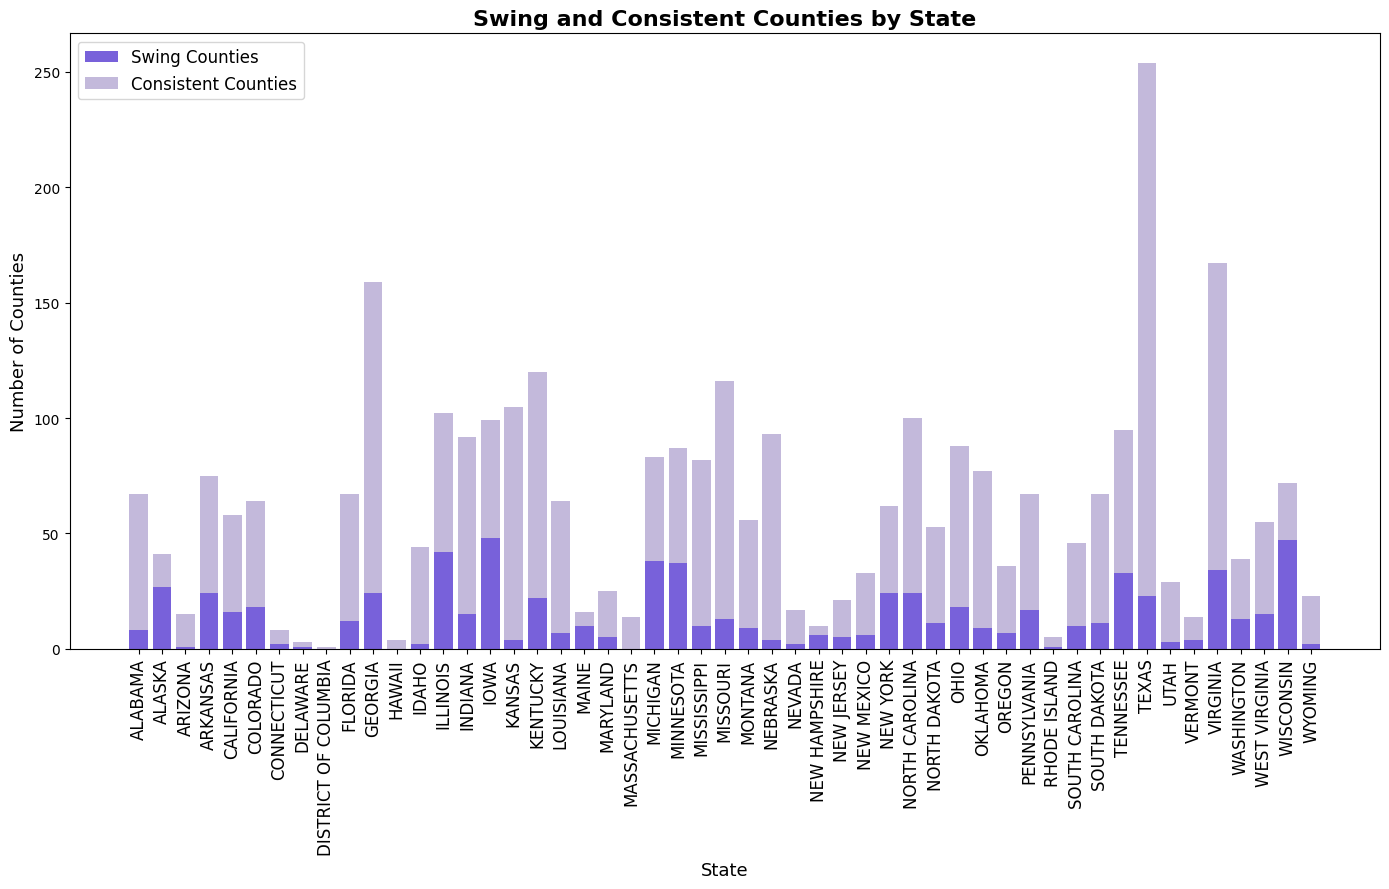

In [4]:
#Swing and Consistent Counties by State visualization

import matplotlib.pyplot as plt

# Count
swing_counts_by_state = swing_counties['state'].value_counts().reset_index()
swing_counts_by_state.columns = ['state', 'swing_counties']
consistent_counties_by_state = consistent_counties['state'].value_counts().reset_index()
consistent_counties_by_state.columns = ['state', 'consistent_counties']

# Merge the counts into single df 
state_counts = pd.merge(swing_counts_by_state, consistent_counties_by_state, on='state', how='outer').fillna(0)

plt.figure(figsize=(14, 9))

plt.bar(state_counts['state'], state_counts['swing_counties'], label='Swing Counties', color = '#7861da')
plt.bar(state_counts['state'], state_counts['consistent_counties'], 
        bottom=state_counts['swing_counties'], label='Consistent Counties', color = '#c3b9db')
plt.xlabel('State', fontsize=13)
plt.ylabel('Number of Counties', fontsize=13)
plt.title('Swing and Consistent Counties by State', fontsize=16, fontweight='bold')
plt.xticks(rotation=90, fontsize=12)
plt.legend(fontsize=12)

plt.tight_layout()
plt.show()

In [5]:
import csv
import pandas as pd

unemployment_data = pd.read_csv("Unemployment(UnemploymentMedianIncome).csv")
list_of_column_names = []

with open('Unemployment(UnemploymentMedianIncome).csv') as csv_file:
    reader = csv.DictReader(csv_file)
    dict_from_csv = dict(list(reader)[0])
    column_names = list(dict_from_csv.keys())
 

unemployment_data_cleaned = unemployment_data[column_names].dropna()

#col names for employment data
columns = []
for i in range(2000,2022):
    new_str = 'employed_' + str(2000 + i)
    new_str2 = 'unemployed_' + str(2000 + i)
    new_str3 = 'unemployment_rate_' + str(2000 + i)
    columns.append(new_str)
    columns.append(new_str2)
    columns.append(new_str3)

#combine
new_columns = [
    "fips_code", "state", "county_name", 
    "rural_code", "urban_code", 
    "metro", "civilian_labor_force"
]
new_columns.append(columns)
                   

# remove
columns_to_remove = [
    'Rural_Urban_Continuum_Code_2013',
    'Urban_Influence_Code_2013',
    'Metro_2013',
    'Median_Household_Income_2021',
    'Med_HH_Income_Percent_of_State_Total_2021'
]
unemployment_data_cleaned = unemployment_data_cleaned.drop(columns=columns_to_remove, errors='ignore')
unemployment_data_cleaned

,FIPS_Code,State,Area_Name,Civilian_labor_force_2000,Employed_2000,Unemployed_2000,Unemployment_rate_2000,Civilian_labor_force_2001,Employed_2001,Unemployed_2001,...,Unemployed_2020,Unemployment_rate_2020,Civilian_labor_force_2021,Employed_2021,Unemployed_2021,Unemployment_rate_2021,Civilian_labor_force_2022,Employed_2022,Unemployed_2022,Unemployment_rate_2022
2,1001,AL,"Autauga County, AL","21,861","20,971",890,4.1,"22,081","21,166",915,...,"1,402",5.3,"26,545","25,809",736,2.8,"26,789","26,181",608,2.3
3,1003,AL,"Baldwin County, AL","69,979","67,370","2,609",3.7,"69,569","66,545","3,024",...,"6,086",6.1,"99,953","97,034","2,919",2.9,"102,849","100,432","2,417",2.4
4,1005,AL,"Barbour County, AL","11,449","10,812",637,5.6,"11,324","10,468",856,...,667,7.7,"8,280","7,821",459,5.5,"8,241","7,906",335,4.1
5,1007,AL,"Bibb County, AL","8,623","8,160",463,5.4,"9,134","8,513",621,...,632,7.3,"8,641","8,347",294,3.4,"8,726","8,507",219,2.5
6,1009,AL,"Blount County, AL","25,266","24,375",891,3.5,"25,450","24,521",929,...,"1,126",4.5,"25,377","24,779",598,2.4,"25,796","25,222",574,2.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3193,56037,WY,"Sweetwater County, WY","20,623","19,822",801,3.9,"20,770","19,962",808,...,"1,529",7.5,"19,354","18,243","1,111",5.7,"19,507","18,696",811,4.2
3194,56039,WY,"Teton County, WY","14,126","13,791",335,2.4,"14,184","13,812",372,...,901,6.0,"15,906","15,375",531,3.3,"16,647","16,193",454,2.7
3195,56041,WY,"Uinta County, WY","10,414","10,004",410,3.9,"10,739","10,339",400,...,580,6.4,"8,812","8,355",457,5.2,"8,863","8,524",339,3.8
3196,56043,WY,"Washakie County, WY","4,287","4,093",194,4.5,"4,206","4,024",182,...,208,5.3,"3,939","3,776",163,4.1,"3,858","3,704",154,4.0


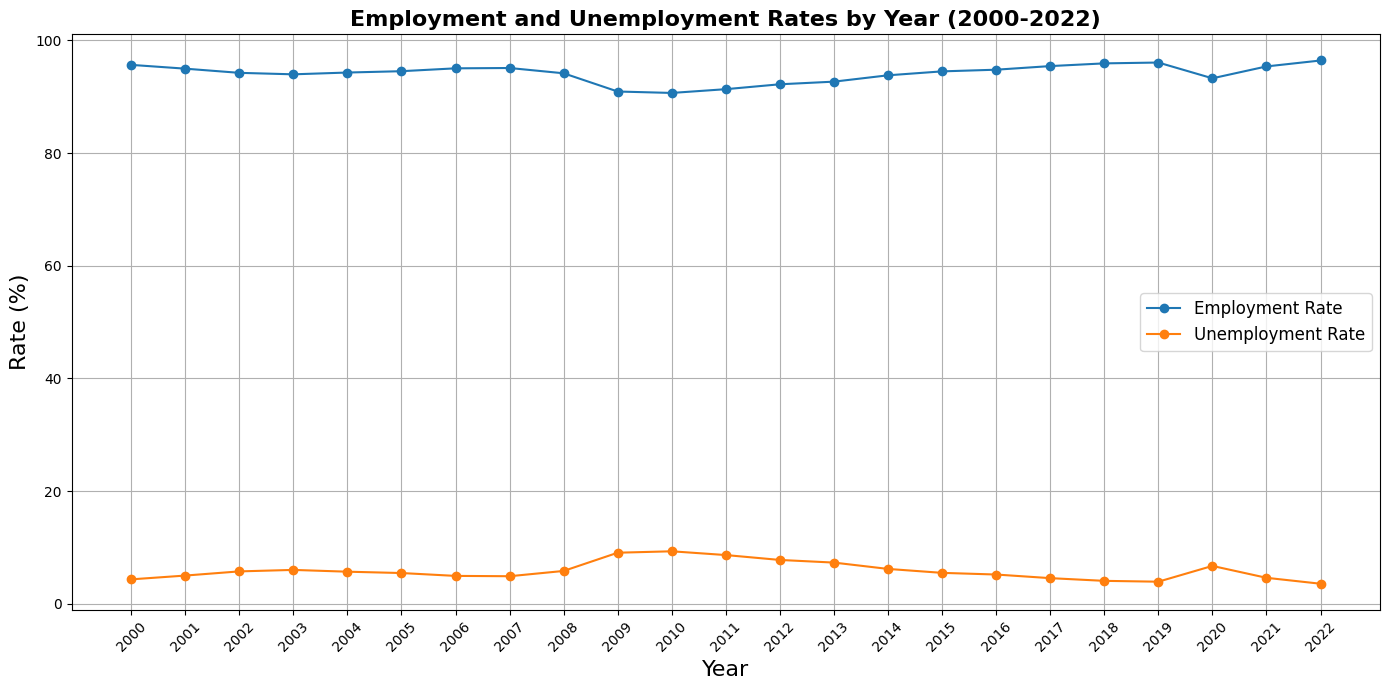

In [6]:
years = range(2000, 2023) 
employment_rates, unemployment_rates = [], []
#compute variable rates
for year in years:
    employed_col = f'Employed_{year}'
    unemployed_col = f'Unemployed_{year}'
    unemployment_rate_col = f'Unemployment_rate_{year}'
    
    if{employed_col, unemployed_col, unemployment_rate_col}.issubset(unemployment_data_cleaned.columns):
        avg_unemployment_rate = unemployment_data_cleaned[unemployment_rate_col].mean()
        unemployment_rates.append(avg_unemployment_rate)
        employment_rates.append(100-avg_unemployment_rate)
    else:
        unemployment_rates.append(None)
        employment_rates.append(None)

# df to store rates
rates_df = pd.DataFrame({
    'Year': list(years),
    'Employment Rate (%)': employment_rates,
    'Unemployment Rate (%)': unemployment_rates
}).dropna()

plt.figure(figsize=(14, 7))
plt.plot(rates_df['Year'], rates_df['Employment Rate (%)'], marker='o', label='Employment Rate')
plt.plot(rates_df['Year'], rates_df['Unemployment Rate (%)'], marker='o', label='Unemployment Rate')
plt.title('Employment and Unemployment Rates by Year (2000-2022)', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=16)
plt.ylabel('Rate (%)', fontsize=16)
plt.legend(fontsize=12)
plt.grid(True)
plt.xticks(rates_df['Year'], rotation=45)
plt.tight_layout() 

plt.show()

In [7]:
import pandas as pd

files ={
    "2000_2010":'population-2000-2010.csv',
    "2010_2020":'population-2010-2020.csv',
    "2020_2023":'population-2020-2023.csv'
}

pop_2000_2010 = pd.read_csv(files["2000_2010"], encoding='ISO-8859-1')
pop_2010_2020 = pd.read_csv(files["2010_2020"], encoding='ISO-8859-1')
pop_2020_2023 = pd.read_csv(files["2020_2023"], encoding='ISO-8859-1')

#define cols to keep
columns_2000_2010 = ['STATE', 'COUNTY', 'STNAME'] + [f'POPESTIMATE{year}' for year in range(2000, 2011)]
columns_2010_2020 = ['STATE', 'COUNTY', 'STNAME'] + [f'POPESTIMATE{year}' for year in range(2011, 2021)]  # Exclude 2010
columns_2020_2023 = ['STATE', 'COUNTY', 'STNAME'] + [f'POPESTIMATE{year}' for year in range(2021, 2023)]  # Exclude 2020

# Filter
pop_2000_2010_filtered = pop_2000_2010[columns_2000_2010]
pop_2010_2020_filtered = pop_2010_2020[columns_2010_2020]
pop_2020_2023_filtered = pop_2020_2023[columns_2020_2023]

# reset 
pop_2000_2010_filtered = pop_2000_2010_filtered.reset_index(drop=True)
pop_2010_2020_filtered = pop_2010_2020_filtered.reset_index(drop=True)
pop_2020_2023_filtered = pop_2020_2023_filtered.reset_index(drop=True)

# merge
combined_df = pd.merge(
    pop_2000_2010_filtered,
    pop_2010_2020_filtered,
    on=['STATE', 'COUNTY', 'STNAME'],
    how='inner' 
)

# merge above with 2020-2023
combined_df = pd.merge(
    combined_df,
    pop_2020_2023_filtered,
    on=['STATE', 'COUNTY', 'STNAME'],
    how='inner' 
)

combined_df = combined_df[combined_df['COUNTY'] != 0]
combined_df['FIPS'] = combined_df['STATE'].astype(str).str.zfill(2) + combined_df['COUNTY'].astype(str).str.zfill(3)

combined_df = combined_df.reset_index(drop=True)
combined_df = combined_df.sort_values(by=['STATE', 'COUNTY']).reset_index(drop=True)

output_file_fips = 'combined_population_with_fips.csv'
combined_df.to_csv(output_file_fips, index=False, encoding='utf-8')

print("The cleaned df with FIPS codes has been saved to:", output_file_fips)
combined_df

The cleaned df with FIPS codes has been saved to: combined_population_with_fips.csv


,STATE,COUNTY,STNAME,POPESTIMATE2000,POPESTIMATE2001,POPESTIMATE2002,POPESTIMATE2003,POPESTIMATE2004,POPESTIMATE2005,POPESTIMATE2006,...,POPESTIMATE2014,POPESTIMATE2015,POPESTIMATE2016,POPESTIMATE2017,POPESTIMATE2018,POPESTIMATE2019,POPESTIMATE2020,POPESTIMATE2021,POPESTIMATE2022,FIPS
0,1,1,Alabama,44021,44889,45909,46800,48366,49676,51328,...,54922,54903,55302,55448,55533,55769,56145,59203,59726,01001
1,1,3,Alabama,141342,144875,147957,151509,156266,162183,168121,...,199306,203101,207787,212737,218071,223565,229287,239439,246531,01003
2,1,5,Alabama,29015,28863,28653,28594,28287,28027,27861,...,26768,26300,25828,25169,24887,24657,24589,24533,24700,01005
3,1,7,Alabama,19913,21028,21199,21399,21721,22042,22099,...,22541,22553,22590,22532,22300,22313,22136,22359,21986,01007
4,1,9,Alabama,51107,51845,52551,53457,54124,54624,55485,...,57536,57535,57487,57801,57770,57840,57879,59079,59516,01009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3126,56,37,Wyoming,37552,36899,37428,37450,38026,38739,39749,...,44996,44780,44319,43663,43188,42917,42673,41626,41374,56037
3127,56,39,Wyoming,18381,18653,18837,19066,19467,19632,20014,...,22801,23083,23255,23383,23261,23385,23497,23605,23297,56039
3128,56,41,Wyoming,19666,19413,19587,19480,19470,19494,19709,...,20835,20777,20711,20449,20299,20196,20215,20681,20727,56041
3129,56,43,Wyoming,8252,8068,7988,7976,7960,8022,7979,...,8277,8282,8180,8013,7886,7824,7760,7719,7724,56043


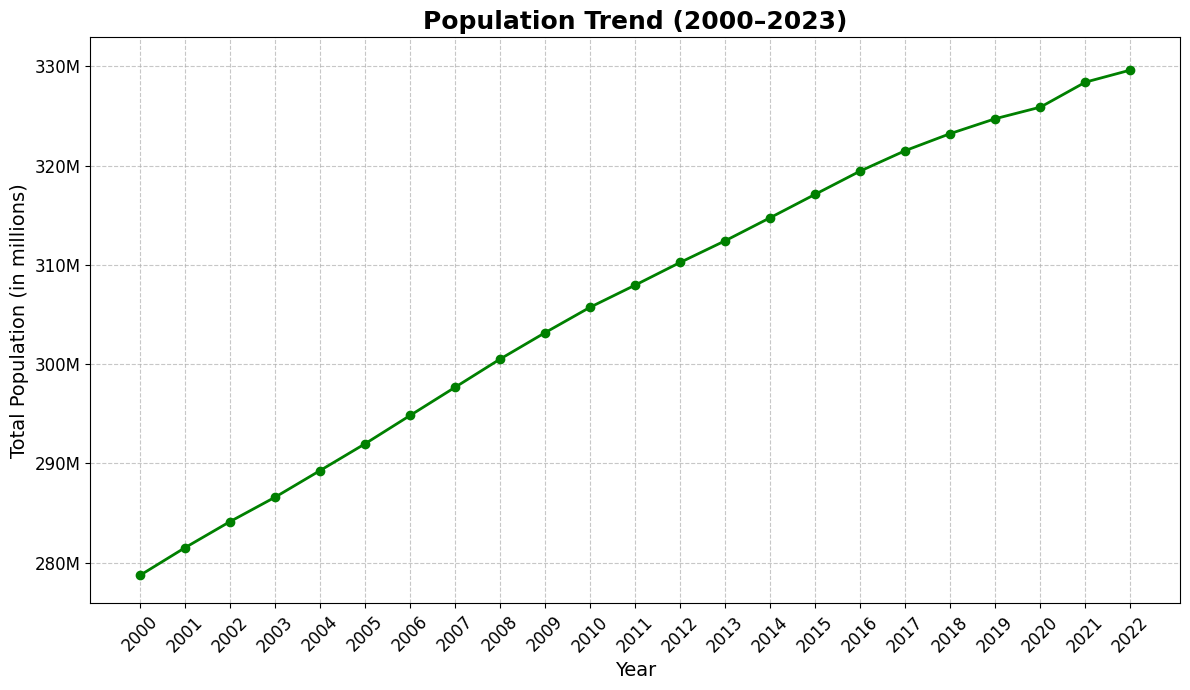

In [8]:
#extract data
population_columns = [col for col in combined_df.columns if col.startswith('POPESTIMATE')]
years = [int(col[-4:]) for col in population_columns]


total_pop = combined_df[population_columns].sum()

population_trend = pd.DataFrame({
    'Year': years,
    'Population': total_pop.values
})

plt.figure(figsize=(12, 7))
plt.plot(
    population_trend['Year'],
    population_trend['Population'],
    marker='o', linestyle='-', linewidth=2, color='green'
)

plt.title('Population Trend (2000–2023)', fontsize=18, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total Population (in millions)', fontsize=14)

plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/1e6:.0f}M'))

plt.ylim([population_trend['Population'].min()*0.99, population_trend['Population'].max()*1.01])
plt.xticks(population_trend['Year'], rotation=45, fontsize=12)
plt.yticks(fontsize=12)

plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [9]:
file_path = "Education.xlsx"

#header starts at row 4 so account for it
education_df = pd.read_excel(file_path, engine='openpyxl', header=3)

# rename
education_df = education_df.rename(columns={
    'FIPS Code': 'fips_code',
    'State': 'state',
    'Area name': 'county_name'
})

#check FIPS codes
education_df['fips_code'] = pd.to_numeric(education_df['fips_code'], errors='coerce')

# remove "County" suffix
education_df['county_name'] = education_df['county_name'].astype(str).str.replace(' County', '', regex=False)

print("Cleaned Education Data (first 5 rows):")
education_df = education_df.dropna()
education_df

Cleaned Education Data (first 5 rows):


,fips_code,state,county_name,2003 Urban Influence Code,2013 Urban Influence Code,2013 Rural-urban Continuum Code,2023 Rural-urban Continuum Code,"Less than a high school diploma, 1970","High school diploma only, 1970","Some college (1-3 years), 1970",...,"Percent of adults completing some college or associate's degree, 2008-12","Percent of adults with a bachelor's degree or higher, 2008-12","Less than a high school diploma, 2018-22","High school diploma only, 2018-22","Some college or associate's degree, 2018-22","Bachelor's degree or higher, 2018-22","Percent of adults with less than a high school diploma, 2018-22","Percent of adults with a high school diploma only, 2018-22","Percent of adults completing some college or associate's degree, 2018-22","Percent of adults with a bachelor's degree or higher, 2018-22"
2,1001,AL,Autauga,2.0,2.0,2.0,2.0,6611.0,3757.0,933.0,...,29.618142,21.707831,3857.0,12517.0,11935.0,11879.0,9.597392,31.146113,29.697920,29.558575
3,1003,AL,Baldwin,5.0,2.0,3.0,3.0,18726.0,8426.0,2334.0,...,31.819503,27.741591,14031.0,46391.0,52215.0,54385.0,8.400690,27.775383,31.262349,32.561579
4,1005,AL,Barbour,6.0,6.0,6.0,6.0,8120.0,2242.0,581.0,...,25.771784,14.524286,4155.0,6507.0,4913.0,2100.0,23.507779,36.814710,27.796322,11.881188
5,1007,AL,Bibb,1.0,1.0,1.0,1.0,5272.0,1402.0,238.0,...,25.538085,8.996005,3366.0,6510.0,4310.0,1739.0,21.136578,40.879121,27.064364,10.919937
6,1009,AL,Blount,1.0,1.0,1.0,1.0,10677.0,3440.0,626.0,...,27.124512,12.381469,7447.0,14414.0,12939.0,6017.0,18.244849,35.313717,31.700027,14.741407
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3210,56037,WY,Sweetwater,8.0,8.0,5.0,5.0,4393.0,3731.0,986.0,...,37.275232,17.006235,1919.0,9010.0,11151.0,5514.0,6.954410,32.652026,40.410959,19.982605
3211,56039,WY,Teton,8.0,8.0,7.0,7.0,708.0,908.0,524.0,...,23.332485,48.994399,721.0,2976.0,3400.0,10776.0,4.034018,16.650814,19.023107,60.292061
3212,56041,WY,Uinta,8.0,8.0,7.0,7.0,1569.0,1517.0,445.0,...,35.045548,18.272985,748.0,4821.0,5169.0,2536.0,5.635076,36.319120,38.940786,19.105017
3213,56043,WY,Washakie,11.0,11.0,7.0,9.0,1572.0,1437.0,590.0,...,35.062865,23.339826,292.0,1571.0,2491.0,1167.0,5.288897,28.454990,45.118638,21.137475


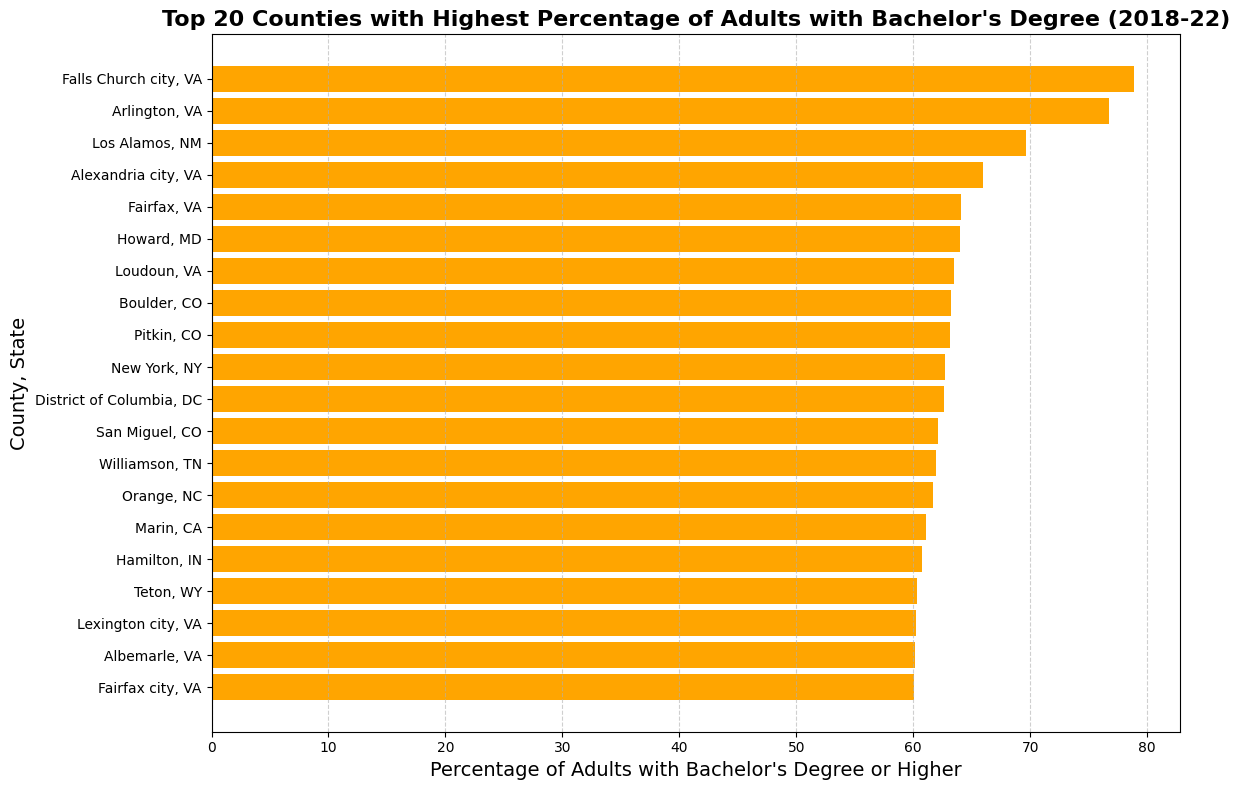

In [10]:
bachelor_col = "Percent of adults with a bachelor's degree or higher, 2018-22"
top_bachelors_data = education_df[['county_name', 'state', bachelor_col]]

# sort by percentage
top_bachelors_data = top_bachelors_data.sort_values(by=bachelor_col, ascending=False).head(20)  

plt.figure(figsize=(12, 8))
plt.barh(
    top_bachelors_data['county_name'] + ', ' + top_bachelors_data['state'], 
    top_bachelors_data[bachelor_col], 
    color='orange'
)
plt.title("Top 20 Counties with Highest Percentage of Adults with Bachelor's Degree (2018-22)", fontsize=16, fontweight='bold')
plt.xlabel("Percentage of Adults with Bachelor's Degree or Higher", fontsize=14)
plt.ylabel("County, State", fontsize=14)
plt.gca().invert_yaxis()  
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Missing FIPS in election_data_cleaned: 0
Missing FIPS in unemployment_data_cleaned: 0
Missing FIPS in combined_df: 0
Merged DataFrame shape: (71403, 17)
   year    state state_abbreviation county_name  fips_code       candidate  \
0  2000  ALABAMA                 AL     AUTAUGA     1001.0         AL GORE   
1  2000  ALABAMA                 AL     AUTAUGA     1001.0  GEORGE W. BUSH   
2  2000  ALABAMA                 AL     AUTAUGA     1001.0     RALPH NADER   
3  2000  ALABAMA                 AL     AUTAUGA     1001.0           OTHER   
4  2000  ALABAMA                 AL     BALDWIN     1003.0         AL GORE   

        party  votes_candidate  votes_total   FIPS State           Area_Name  \
0    DEMOCRAT             4942        17208  01001    AL  Autauga County, AL   
1  REPUBLICAN            11993        17208  01001    AL  Autauga County, AL   
2       GREEN              160        17208  01001    AL  Autauga County, AL   
3       OTHER              113        17208  01001    AL  

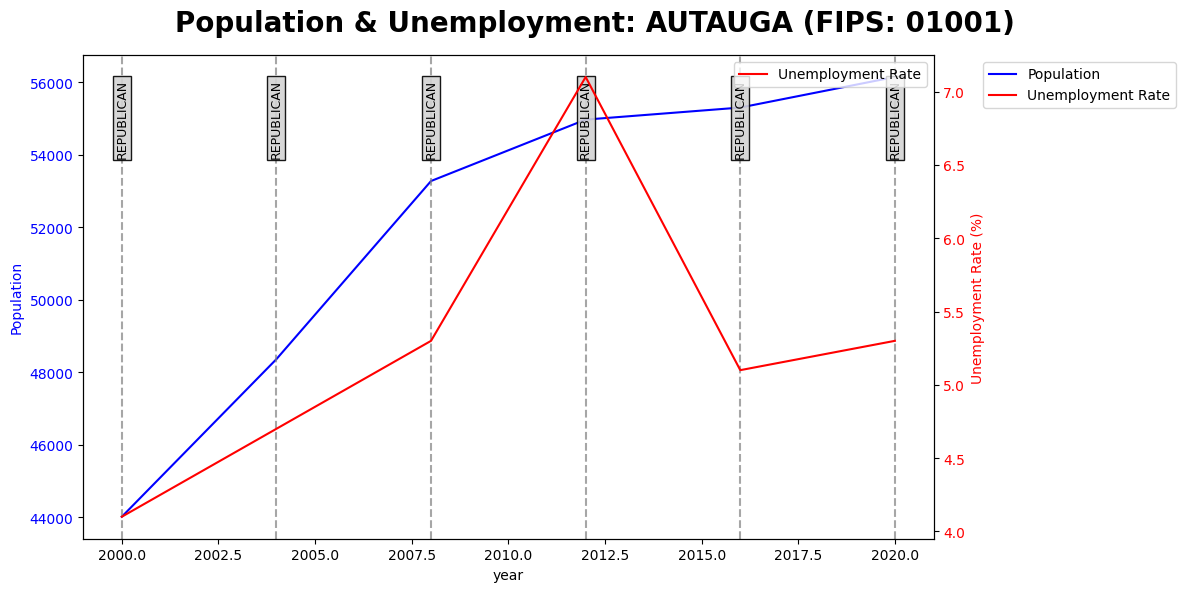

Visualization for AUTAUGA (FIPS Code: 01001)


In [14]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

#Step 1: Load/clean election data
election_df = pd.read_csv("countypres_2000-2020.csv")
election_data_cleaned = election_df[
    ['year', 'state', 'state_po', 'county_name', 'county_fips', 'candidate', 'party', 'candidatevotes', 'totalvotes']
].dropna().rename(columns={
    'state_po': 'state_abbreviation',
    'county_fips': 'fips_code',
    'candidatevotes': 'votes_candidate',
    'totalvotes': 'votes_total'
})

#load/clean unemployment data
unemployment_data = pd.read_csv("Unemployment(UnemploymentMedianIncome).csv")

with open('Unemployment(UnemploymentMedianIncome).csv') as csv_file:
    csv_reader = csv.DictReader(csv_file)
    dict_from_csv = dict(list(csv_reader)[0])
    column_names = list(dict_from_csv.keys())

unemployment_data_cleaned = unemployment_data[column_names].dropna()

#create code if possible
if 'State_FIPS' in unemployment_data_cleaned.columns and 'County_FIPS' in unemployment_data_cleaned.columns:
    unemployment_data_cleaned['fips_code'] = (
        unemployment_data_cleaned['State_FIPS'].astype(str).str.zfill(2) +
        unemployment_data_cleaned['County_FIPS'].astype(str).str.zfill(3)
    ).astype(int)
    unemployment_data_cleaned = unemployment_data_cleaned.drop(columns=['State_FIPS', 'County_FIPS'], errors='ignore')
else:
    print("Warning: Unemployment data does not have State_FIPS and County_FIPS.")

columns_to_remove = [
    'Rural_Urban_Continuum_Code_2013',
    'Urban_Influence_Code_2013',
    'Metro_2013',
    'Median_Household_Income_2021',
    'Med_HH_Income_Percent_of_State_Total_2021'
]
unemployment_data_cleaned = unemployment_data_cleaned.drop(columns=columns_to_remove, errors='ignore')
unemployment_data_cleaned.columns = [c.replace(' ', '_') for c in unemployment_data_cleaned.columns]

#Load/clean population data
combined_df = pd.read_csv('combined_population_with_fips.csv')
# Ensure FIPS is a string
combined_df['FIPS'] = combined_df['FIPS'].apply(lambda x: str(int(x)).zfill(5))

#Load/clean education data
education_df = pd.read_excel("Education.xlsx", engine='openpyxl', header=3)
education_df = education_df.rename(columns={
    'FIPS Code': 'fips_code',
    'State': 'state',
    'Area name': 'county_name'
})
education_df['fips_code'] = pd.to_numeric(education_df['fips_code'], errors='coerce')
education_df['county_name'] = education_df['county_name'].astype(str).str.replace(' County', '', regex=False)
education_df = education_df.dropna()

#Step 2: Standardize FIPS Codes
election_data_cleaned['FIPS'] = election_data_cleaned['fips_code'].apply(
    lambda x: str(int(x)).zfill(5) if pd.notnull(x) else None
)
#unemployment data cleaned FIPS
if 'fips_code' in unemployment_data_cleaned.columns:
    unemployment_data_cleaned['FIPS'] = unemployment_data_cleaned['fips_code'].apply(lambda x: str(int(x)).zfill(5) if pd.notnull(x) else None)
    unemployment_data_cleaned.drop(columns=['fips_code'], inplace=True)
elif 'FIPS_Code' in unemployment_data_cleaned.columns:
    unemployment_data_cleaned['FIPS'] = unemployment_data_cleaned['FIPS_Code'].apply(lambda x: str(int(x)).zfill(5) if pd.notnull(x) else None)
    unemployment_data_cleaned.drop(columns=['FIPS_Code'], inplace=True)
else:
    raise KeyError("Neither 'fips_code' nor 'FIPS_Code' found in unemployment_data_cleaned df.")


#Step 3: Handle missing FIPS codes
print("Missing FIPS in election_data_cleaned:", election_data_cleaned['FIPS'].isnull().sum())
print("Missing FIPS in unemployment_data_cleaned:", unemployment_data_cleaned['FIPS'].isnull().sum())
print("Missing FIPS in combined_df:", combined_df['FIPS'].isnull().sum())

election_data_cleaned = election_data_cleaned.dropna(subset=['FIPS'])
unemployment_data_cleaned = unemployment_data_cleaned.dropna(subset=['FIPS'])
combined_df = combined_df.dropna(subset=['FIPS'])


#Step 4: Transform data to long format
unemployment_cols = [col for col in unemployment_data_cleaned.columns if 'Unemployment_rate_' in col]

unemployment_long = unemployment_data_cleaned.melt(
    id_vars=['FIPS', 'State', 'Area_Name'],
    value_vars=unemployment_cols,
    var_name='variable',
    value_name='unemployment_rate'
)

unemployment_long['year'] = unemployment_long['variable'].str.extract(r'(\d{4})').astype(int)
unemployment_long = unemployment_long.drop(columns='variable')

pop_cols = [col for col in combined_df.columns if 'POPESTIMATE' in col]
population_long = combined_df.melt(
    id_vars=['STATE', 'COUNTY', 'STNAME', 'FIPS'],
    value_vars=pop_cols,
    var_name='variable',
    value_name='population'
)
population_long['year'] = population_long['variable'].str.extract(r'(\d{4})').astype(int)
population_long = population_long.drop(columns='variable')

#Step 5: Merge the dataframes
# Merge elections with unemployment data
merged = pd.merge(
    election_data_cleaned,
    unemployment_long,
    on=['FIPS', 'year'],
    how='inner'
)

# merge above with population data
merged = pd.merge(
    merged,
    population_long,
    on=['FIPS', 'year'],
    how='inner'
)
print(f"Merged DataFrame shape: {merged.shape}")
print(merged.head())

#Step 6: Visualize function
def visualize_county_data(merged_data, fips_code):
    fips_code = str(fips_code).zfill(5)
    county_data = merged_data.query("FIPS == @fips_code")
   
    if county_data.empty:
        print(f"No data found for FIPS code {fips_code}. Please check the input.")
        return  
    if 'county_name' in county_data.columns:
        county_name = county_data['county_name'].iloc[0]
    elif 'Area_Name' in county_data.columns:
        county_name = county_data['Area_Name'].iloc[0]
    else:
        county_name = "Unknown County"
   
    #winning party per year
    winners = (
        county_data.loc[county_data.groupby('year')['votes_candidate'].idxmax()]
        [['year', 'party']]
        .rename(columns={'party': 'winning_party'})
    )
    county_data = pd.merge(county_data, winners, on='year', how='left')
   
    county_plot_data = county_data.drop_duplicates(subset=['year'])
   
    fig, ax1 = plt.subplots(figsize=(12, 6))
    sns.lineplot(data=county_plot_data, x='year', y='population', ax=ax1, color='blue', label='Population')
    ax1.set_ylabel('Population', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')
   
    ax2 = ax1.twinx()
    sns.lineplot(data=county_plot_data, x='year', y='unemployment_rate', ax=ax2, color='red', label='Unemployment Rate')
    ax2.set_ylabel('Unemployment Rate (%)', color='red')
    ax2.tick_params(axis='y', labelcolor='red')
   
    election_years = [2000, 2004, 2008, 2012, 2016, 2020]
    for year in election_years:
        party = county_plot_data.loc[county_plot_data['year'] == year, 'winning_party'].values
        if len(party) > 0:
            party = party[0]
        else:
            party = "N/A"
        ax1.axvline(x=year, color='grey', linestyle='--', alpha=0.7)
        y_pos = ax1.get_ylim()[1] * 0.95
        ax1.text(
            year,
            y_pos,
            f"{party}",
            rotation=90,
            va='bottom',
            ha='center',
            fontsize=9,
            bbox=dict(boxstyle="square,pad=0.2", facecolor="lightgray", alpha=0.9)
        )
   
    plt.suptitle(f'Population & Unemployment: {county_name} (FIPS: {fips_code})', fontsize=20, fontweight='bold')
   
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left', bbox_to_anchor=(1.05, 1))

    plt.tight_layout()
    plt.show()
    print(f"Visualization for {county_name} (FIPS Code: {fips_code})")

#Step 7: Run the visualization
fips_code_input = input("Enter a FIPS code (e.g., '01001' for Autauga County, AL): ").strip()
visualize_county_data(merged, fips_code_input)
